# 京都観光における国籍依存リスク分析  
## 分析レポート

---
# 1. データの概要
本分析では、京都市の宿泊需要構造と国籍依存リスクを定量的に評価するため、以下の3種類の公的データを使用した。
---

## 1.1 JNTO 時系列推移表（国籍/月別 訪日外客数）
### ■ データ内容
- 月次訪日外国人客数
- 国籍別および総数
- 分析期間：2015年4月〜2025年12月
- 本分析では「総訪日外客数（総数）」を主に使用

### ■ 利用目的
- 日本全体の訪日需要の動向把握
- 京都市宿泊需要との連動性の検証
- マクロショック（コロナ禍、円安等）の統制変数

### ■ 主な変数
- `visitors_total`：訪日外国人総数
- `yoy_rate`：前年同月比増減率
- `yoy_diff`：前年差

### ■ 出典
日本政府観光局（JNTO）  
「訪日外客統計」  
https://www.jnto.go.jp/jpn/statistics/data_info_listing/

---

## 1.2 KCTA 京都市観光協会宿泊統計

### ■ データ内容
- 京都市内宿泊施設の月次宿泊統計
- 国籍別延べ宿泊者数
- 実人数・推定泊数等
- 分析期間：2015年4月〜2025年12月

### ■ 前処理
- 「総計」「日本」を除外し外国人のみ分析対象とした
- 国別延べ宿泊者数を月次で集計
- 月次総外国人延べ宿泊数を算出
- 国籍構成比を計算
- ハーフィンダール指数（HHI）により国籍集中度を測定

### ■ 主な変数
- `kyoto_total_nights`：京都市外国人延べ宿泊数
- `kyoto_yoy_rate`：前年同月比増減率
- `kyoto_yoy_diff`：前年差
- `HHI`：国籍依存度指数

### ■ 出典
京都市観光協会（KCTA）  
「京都市観光協会 宿泊統計」  
https://www.kyokanko.or.jp/about-kta/report_download/

---

## 1.3 FRED 為替レート

### ■ データ内容
- 日次為替レート（FRED APIより取得）
- DEXJPUS（USD/JPY）
- DEXCHUS（CNY/USD）
- 月平均値へ変換

### ■ 加工方法
人民元円レートは以下の式で算出した：

\[
CNY/JPY = \frac{USD/JPY}{CNY/USD}
\]

その後、日次データを月次平均へ変換した。

### ■ 利用目的
- 為替変動による訪日需要への影響の統制
- 中国市場・米国市場の感応度分析

### ■ 主な変数
- `usd_jpy`
- `cny_jpy`
- 各為替レートの前年同月比

### ■ 出典
Federal Reserve Bank of St. Louis  
FRED (Federal Reserve Economic Data)  
https://fred.stlouisfed.org/

---

# 2. データ統合の考え方

| データ | 役割 |
|--------|--------|
| KCTA | 京都市宿泊需要（目的変数） |
| JNTO | 全国訪日需要（統制変数） |
| 為替 | マクロ経済要因（外生変数） |

---

# 3. 分析期間

2015年4月 〜 2025年12月（月次データ）

---

# 4. 分析の特徴

- 国籍構成比から依存度（HHI）を算出
- マクロ要因を統制した需要分析
- 中国人観光客減少などのシナリオ分析への拡張が可能
- 線形回帰および機械学習モデルへの展開可能な設計

KCTA panel shape: (6321, 53)
KCTA columns: ['国', '地域', '推定泊数_2019年', '推定泊数_2019年差', '部屋あたり人数_2019年', '部屋あたり人数_2019年差', '#', '実人数 前年', '実人数 前年 構成比', '実人数 前年伸率 (客室数補正あり）', '実人数 前年伸率 (客室数補正なし）', '実人数 当年', '実人数 当年 構成比', '実人数_2019年', '実人数_2019年伸率 （客室数補正あり）', '実人数_2019年伸率 （客室数補正なし）', '年', '延べ人数 前年', '延べ人数 前年 構成比', '延べ人数 前年伸率 (客室数補正あり）', '延べ人数 前年伸率 (客室数補正なし）', '延べ人数 当年', '延べ人数 当年 構成比', '延べ人数_2019年', '延べ人数_2019年伸率 （客室数補正あり）', '延べ人数_2019年伸率 （客室数補正なし）', '延べ部屋数 前年', '延べ部屋数 前年 構成比', '延べ部屋数 前年伸率 (客室数補正あり）', '延べ部屋数 前年伸率 (客室数補正なし）', '延べ部屋数 当年', '延べ部屋数 当年 構成比', '延べ部屋数_2019年', '延べ部屋数_2019年伸率 （客室数補正あり）', '延べ部屋数_2019年伸率 （客室数補正なし）', '推定泊数 前年', '推定泊数 前年差', '推定泊数 当年', '月', '総客室数 (Sheet1)', '総客室数_2019年 (Sheet1)', '総客室数_前年 (Sheet1)', '部屋あたり人数_前年', '部屋あたり人数_前年差', '部屋あたり人数_当年', 'month_num', 'year_num', 'date', 'nights', 'yoy_rate', 'yoy_diff', 'total_nights_month', 'share']
KCTA countries: ['UAE' 'その他' 'アフリカ' 'アメリカ' 'イギリス' 'イスラエル' 'イタリア' 'インド' 'インドネシア' 'オセアニア小計'
 'オランダ' 'オーストラリア' 'カタール' 'カナダ' 'サウジアラビア' 'シンガポール'

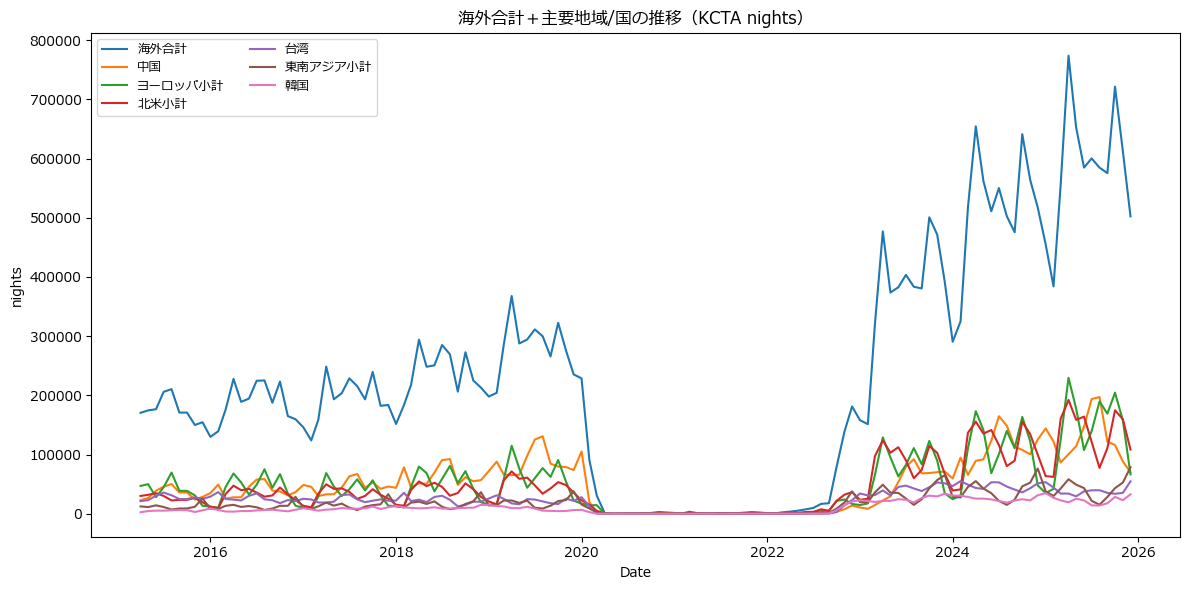

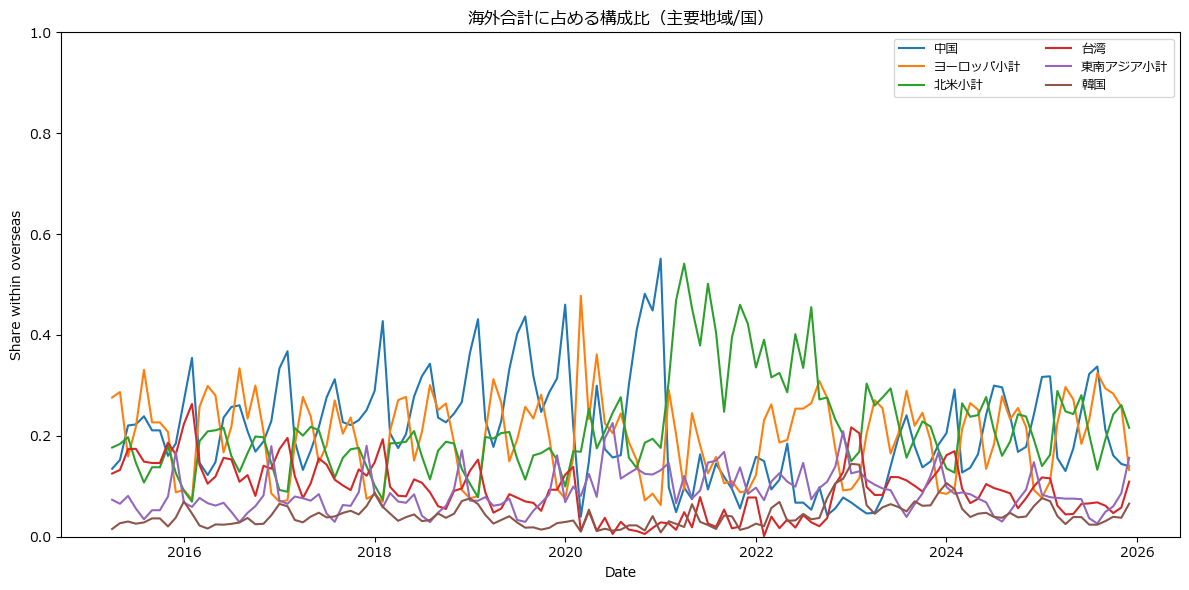

JNTO+FX shape: (129, 6) date: 2015-04-01 00:00:00 〜 2025-12-01 00:00:00
CSV出力完了: C:\Users\81809\hackathon_2026\data\jnto_fx_merged.csv
Master shape: (129, 10)
Missing:
date                   0
kyoto_total_nights     0
kyoto_yoy_rate        12
kyoto_yoy_diff        12
HHI                    0
visitors_total         0
yoy_rate              12
yoy_diff              12
usd_jpy                0
cny_jpy                0
dtype: int64
分析用件数: 117
         date  kyoto_total_nights  kyoto_yoy_rate  kyoto_yoy_diff       HHI  \
12 2016-04-01             1360934        0.176950        204611.0  0.176417   
13 2016-05-01             1299962        0.016944         21659.0  0.199956   
14 2016-06-01             1254384        0.077786         90531.0  0.190687   
15 2016-07-01             1346945        0.030014         39249.0  0.180111   
16 2016-08-01             1482123        0.040768         58056.0  0.194680   

    visitors_total  yoy_rate  yoy_diff     usd_jpy    cny_jpy  
12         2081697 

In [59]:
# ============================================================
# KCTA（CSV）整形 + 可視化 + 為替(FRED) + JNTO(年別シート) + マスター統合
# ============================================================
import pandas as pd
import numpy as np
import re
import datetime
from pandas_datareader import data as web
import matplotlib as mpl
import matplotlib.pyplot as plt

# ----------------------------
# 0) 設定
# ----------------------------
START_DATE = "2015-04-01"
END_DATE   = "2025-12-01"

KCTA_PATH = r"C:\Users\81809\hackathon_2026\data\KCTA.csv"
JNTO_PATH = r"C:\Users\81809\hackathon_2026\data\JNTO.xlsx"
OUT_JNTO_FX = r"C:\Users\81809\hackathon_2026\data\jnto_fx_merged.csv"

# 日本語フォント（文字化け対策）
mpl.rcParams["font.family"] = ["Meiryo", "Yu Gothic", "MS Gothic"]
mpl.rcParams["axes.unicode_minus"] = False

# ============================================================
# 1) KCTA CSV 読み込み・整形（国×月パネル）
# ============================================================
try:
    df_kcta = pd.read_csv(KCTA_PATH, encoding="utf-8")
except UnicodeDecodeError:
    df_kcta = pd.read_csv(KCTA_PATH, encoding="cp932")

# month/year/date
df_kcta["month_num"] = (
    df_kcta["月"].astype(str).str.replace("月", "", regex=False).astype(int)
)
df_kcta["year_num"] = df_kcta["年"].astype(int)
df_kcta["date"] = pd.to_datetime(
    df_kcta["year_num"].astype(str) + "-" + df_kcta["month_num"].astype(str) + "-01"
)

# 総計・日本除外（外国人分析用）
df_kcta = df_kcta[df_kcta["国"] != "総計"]
df_kcta = df_kcta[df_kcta["国"] != "日本"]

# 数値列のクリーニング
numeric_cols = ["延べ人数 当年", "実人数 当年", "推定泊数 当年"]
for col in numeric_cols:
    if col in df_kcta.columns:
        df_kcta[col] = (
            df_kcta[col].astype(str).str.replace(",", "", regex=False)
        )
        df_kcta[col] = pd.to_numeric(df_kcta[col], errors="coerce")

# 分析対象（延べ人数）
df_kcta["nights"] = df_kcta["延べ人数 当年"]

# ソート
df_kcta = df_kcta.sort_values(["国", "date"]).reset_index(drop=True)

# 国別 YoY（参考：国別の増減率も持つ）
df_kcta["yoy_rate"] = df_kcta.groupby("国")["nights"].pct_change(12)
df_kcta["yoy_diff"] = df_kcta.groupby("国")["nights"].diff(12)

# 月次総数・構成比
df_kcta["total_nights_month"] = df_kcta.groupby("date")["nights"].transform("sum")
df_kcta["share"] = df_kcta["nights"] / df_kcta["total_nights_month"]

# HHI（国籍集中度）
hhi_df = (
    df_kcta.groupby("date")["share"]
    .apply(lambda x: (x**2).sum())
    .reset_index()
    .rename(columns={"share": "HHI"})
)

# 期間フィルタ（KCTA側も揃える）
df_kcta = df_kcta[(df_kcta["date"] >= START_DATE) & (df_kcta["date"] <= END_DATE)].copy()
hhi_df  = hhi_df[(hhi_df["date"] >= START_DATE) & (hhi_df["date"] <= END_DATE)].copy()

print("KCTA panel shape:", df_kcta.shape)
print("KCTA columns:", df_kcta.columns.tolist())
print("KCTA countries:", df_kcta["国"].unique())

# ============================================================
# 2) KCTA 可視化（指定カテゴリのみ）
#    ※あなたのdfは日本/総計を除外しているため「国内合計」は存在しません。
#    「海外合計」のみ + 地域/国で描画します。
# ============================================================
VALUE_COL = "nights"
ts = (
    df_kcta.pivot_table(index="date", columns="国", values=VALUE_COL, aggfunc="sum")
    .sort_index()
)

# 指定カテゴリ（存在するものだけ使う）
target_cols = ["海外合計", "中国", "ヨーロッパ小計", "北米小計", "台湾", "東南アジア小計", "韓国"]
missing = [c for c in target_cols if c not in ts.columns]
if missing:
    print("WARNING: 次の列が見つからないため除外します:", missing)
target_cols = [c for c in target_cols if c in ts.columns]

ts_sel = ts[target_cols].copy()

# 人数推移
plt.figure(figsize=(12, 6))
for c in ts_sel.columns:
    plt.plot(ts_sel.index, ts_sel[c], label=c)
plt.title("海外合計＋主要地域/国の推移（KCTA nights）")
plt.xlabel("Date")
plt.ylabel("nights")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

# 海外合計に占める構成比
if "海外合計" in ts_sel.columns:
    share_overseas = ts_sel.copy()
    den = share_overseas["海外合計"].replace(0, np.nan)
    for c in share_overseas.columns:
        if c != "海外合計":
            share_overseas[c] = share_overseas[c] / den

    plt.figure(figsize=(12, 6))
    for c in share_overseas.columns:
        if c == "海外合計":
            continue
        plt.plot(share_overseas.index, share_overseas[c], label=c)
    plt.title("海外合計に占める構成比（主要地域/国）")
    plt.xlabel("Date")
    plt.ylabel("Share within overseas")
    plt.ylim(0, 1)
    plt.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("WARNING: '海外合計' が無いため海外合計分母の構成比は描画できません。")

# ============================================================
# 3) 為替：FRED日次 → 月次平均（df_fx）
# ============================================================
start = datetime.datetime(2015, 1, 1)
end   = datetime.datetime(2025, 12, 31)

usd_jpy = web.DataReader("DEXJPUS", "fred", start, end).rename(columns={"DEXJPUS": "usd_jpy"})
usd_cny = web.DataReader("DEXCHUS", "fred", start, end).rename(columns={"DEXCHUS": "usd_cny"})

df_fx_daily = usd_jpy.join(usd_cny, how="inner").ffill()
df_fx_daily["cny_jpy"] = df_fx_daily["usd_jpy"] / df_fx_daily["usd_cny"]

df_fx_daily["date"] = df_fx_daily.index.to_period("M").to_timestamp()
df_fx = (
    df_fx_daily.groupby("date", as_index=False)[["usd_jpy", "cny_jpy"]]
    .mean()
    .sort_values("date")
)
df_fx = df_fx[(df_fx["date"] >= START_DATE) & (df_fx["date"] <= END_DATE)].reset_index(drop=True)

# ============================================================
# 4) JNTO：年別シートから「総数」を抽出（df_jnto）
# ============================================================
xls = pd.ExcelFile(JNTO_PATH)
years_needed = [str(y) for y in range(2015, 2026)]

rows = []

for sheet in xls.sheet_names:
    if sheet not in years_needed:
        continue

    year = int(sheet)
    tmp = pd.read_excel(JNTO_PATH, sheet_name=sheet, header=None)

    # 月ヘッダー行を探す
    month_row_idx = None
    for i in range(len(tmp)):
        r = tmp.iloc[i].astype(str)
        if (r.str.contains(r"1月", regex=True, na=False)).any():
            month_row_idx = i
            break
    if month_row_idx is None:
        continue

    month_row = tmp.iloc[month_row_idx]

    month_cols = {}
    for col_idx, val in month_row.items():
        s = str(val).strip()
        if re.fullmatch(r"\d+月", s):
            m = int(re.findall(r"\d+", s)[0])
            month_cols[m] = col_idx

    # 「総数」行
    total_row_idx = None
    for i in range(len(tmp)):
        if str(tmp.iloc[i, 0]).strip() == "総数":
            total_row_idx = i
            break
    if total_row_idx is None:
        continue

    for m, col_idx in month_cols.items():
        v = tmp.iloc[total_row_idx, col_idx]
        if pd.isna(v):
            continue
        s = str(v).replace(",", "").replace("*", "").strip()
        if s in ["-", "—", "nan", "NaN", ""]:
            val = np.nan
        else:
            val = pd.to_numeric(s, errors="coerce")

        date = pd.to_datetime(f"{year}-{m:02d}-01")
        rows.append({"date": date, "visitors_total": val})

df_jnto = pd.DataFrame(rows).sort_values("date").reset_index(drop=True)
df_jnto = df_jnto[(df_jnto["date"] >= START_DATE) & (df_jnto["date"] <= END_DATE)].reset_index(drop=True)

if df_jnto.empty:
    raise RuntimeError("df_jnto が空です。JNTO.xlsxの形式が想定と異なる可能性があります。")

df_jnto["yoy_rate"] = df_jnto["visitors_total"].pct_change(12)
df_jnto["yoy_diff"] = df_jnto["visitors_total"].diff(12)

# JNTO×FX
df_jnto_fx = df_jnto.merge(df_fx, on="date", how="left").sort_values("date").reset_index(drop=True)
df_jnto_fx[["usd_jpy", "cny_jpy"]] = df_jnto_fx[["usd_jpy", "cny_jpy"]].ffill()

if df_jnto_fx.empty:
    raise RuntimeError("df_jnto_fx が空です。dateの範囲やフィルタを確認してください。")

print("JNTO+FX shape:", df_jnto_fx.shape, "date:", df_jnto_fx["date"].min(), "〜", df_jnto_fx["date"].max())
df_jnto_fx.to_csv(OUT_JNTO_FX, index=False, encoding="utf-8-sig")
print("CSV出力完了:", OUT_JNTO_FX)

# ============================================================
# 5) マスター作成（京都市：月次総外国人延べ宿泊 + HHI + JNTO/為替）
# ============================================================
kyoto_monthly = (
    df_kcta.groupby("date")["nights"]
    .sum()
    .reset_index()
    .rename(columns={"nights": "kyoto_total_nights"})
).sort_values("date").reset_index(drop=True)

kyoto_monthly["kyoto_yoy_rate"] = kyoto_monthly["kyoto_total_nights"].pct_change(12)
kyoto_monthly["kyoto_yoy_diff"] = kyoto_monthly["kyoto_total_nights"].diff(12)

kyoto_monthly = kyoto_monthly.merge(hhi_df, on="date", how="left")

df_master = (
    kyoto_monthly.merge(df_jnto_fx, on="date", how="left")
    .sort_values("date")
    .reset_index(drop=True)
)

print("Master shape:", df_master.shape)
print("Missing:")
print(df_master.isna().sum())

df_analysis = df_master.dropna().copy()
print("分析用件数:", len(df_analysis))
print(df_analysis.head())